Importing dependencies


In [3]:
!pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing





In [23]:
data = pd.read_csv('/content/loan_dataset.csv')

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#no of rows and column
data.shape

(614, 13)

In [11]:
data.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]>

In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
#no of missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [71]:
data = data.dropna()

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Label Encoding

In [24]:
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [25]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [27]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [28]:
data = data.replace(to_replace='3+',value=4)

In [29]:
data['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

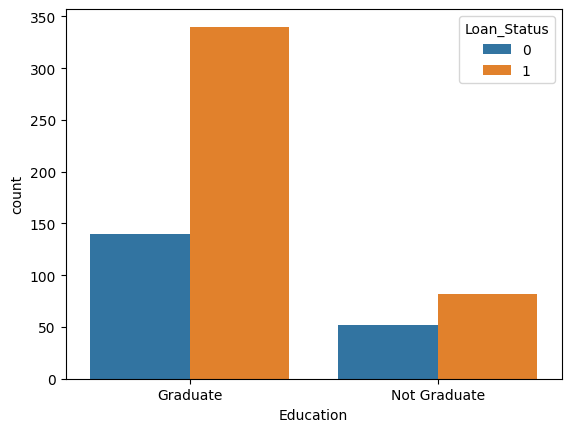

In [30]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

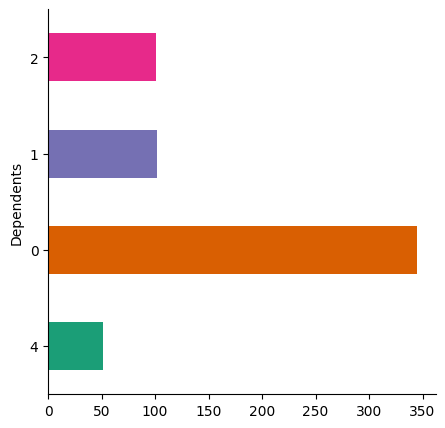

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
data.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Married', ylabel='count'>

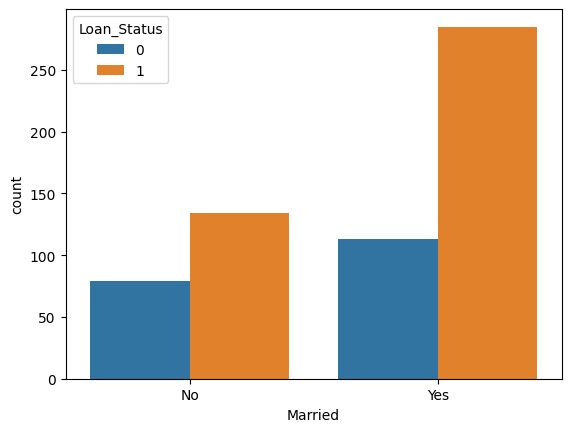

In [31]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

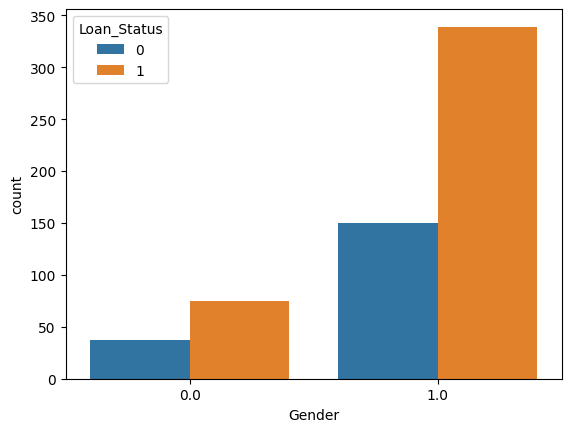

In [37]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

Converting categorical values into Numerical values

In [70]:
# convert categorical columns to numerical values
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1


### Separate Data and Label

In [73]:
x= data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [74]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [75]:
x.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2
5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,1.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2


In [76]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
5       1.0      1.0          2          1            1.0             5417   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [77]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [81]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=3)

In [82]:
print(x.shape , x_train.shape , x_test.shape)

(480, 11) (432, 11) (48, 11)


### Training the model

Support Vector Machine Model

In [86]:
model = svm.SVC(kernel='linear')

In [87]:
#training the model on train data
model.fit(x_train , y_train)

SVC(kernel='linear')

Model Evaluation

In [88]:
#accuracy test for train data

x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [89]:
print("Accuracy of Train data ", training_data_accuracy)

Accuracy of Train data  0.7986111111111112


In [90]:
#accuracy test for test data

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)


In [91]:
print("Accuracy of Test Data ",test_data_accuracy)

Accuracy of Test Data  0.7916666666666666
